# S2 Tarea
1. Consiga una imagen que tenga ruido gaussiano y aplique el filtro de media para solucionar el ruido.

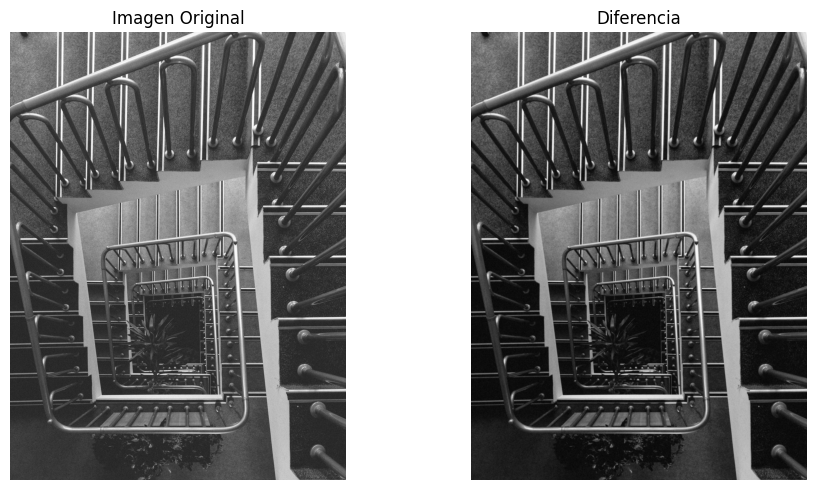

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

def mean_filter(image, kernel_size):
  height, width = image.shape
  filtered = np.zeros_like(image)
  pad = kernel_size // 2
  
  padded = np.pad(image, pad, mode='edge')
  
  for i in range(height):
    for j in range(width):
      neighborhood = padded[i:i+kernel_size, j:j+kernel_size]
      filtered[i, j] = np.mean(neighborhood)
  
  return filtered

img_original = cv2.imread('image.jpg', cv2.IMREAD_GRAYSCALE)

kernel_size = 5
img_filtrada = mean_filter(img_original, kernel_size)

plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.imshow(img_original, cmap='gray')
plt.title('Imagen Original')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(img_filtrada, cmap='gray')
plt.title('Imagen Filtrada (Media)')
plt.axis('off')
plt.title('Diferencia')
plt.axis('off')

plt.tight_layout()
plt.show()

2. Consiga una imagen que tenga ruido sal y pimienta y aplique el filtro de mediana para solucionar el ruido.

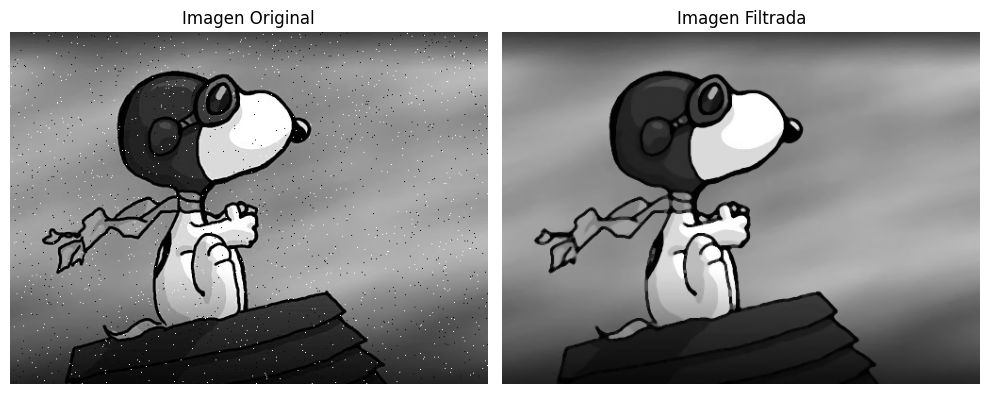

In [30]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

img = cv2.imread('image2.png', cv2.IMREAD_GRAYSCALE)

def median_filter_manual(image, kernel_size):
  height, width = image.shape
  filtered = np.zeros_like(image)
  pad = kernel_size // 2
  
  padded = np.pad(image, pad, mode='edge')
  
  for i in range(height):
    for j in range(width):
      neighborhood = padded[i:i+kernel_size, j:j+kernel_size]
      filtered[i, j] = np.median(neighborhood)
  
  return filtered

img_mediana_filtrada = median_filter_manual(img, 5)

plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.imshow(img, cmap='gray')
plt.title('Imagen Original')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(img_mediana_filtrada, cmap='gray')
plt.title('Imagen Filtrada')
plt.axis('off')

plt.tight_layout()
plt.show()


3. Consiga una imagen y detecte los bordes aplicando el filtro de Sobel X

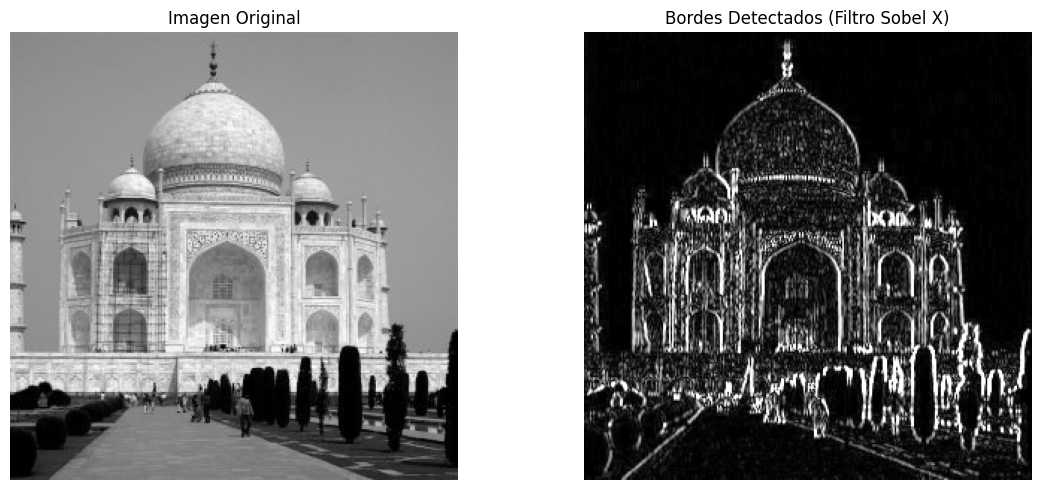

In [36]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

img_sobel = cv2.imread('image3.jpg', cv2.IMREAD_GRAYSCALE)

def sobel_x_filter(image):
  sobel_x_kernel = np.array([[-1, 0, 1],
                [-2, 0, 2],
                [-1, 0, 1]], dtype=np.float32)
  
  height, width = image.shape
  filtered = np.zeros_like(image, dtype=np.float32)
  
  padded = np.pad(image, 1, mode='edge')
  
  for i in range(height):
    for j in range(width):
      neighborhood = padded[i:i+3, j:j+3].astype(np.float32)
      filtered[i, j] = np.sum(neighborhood * sobel_x_kernel)
  
  filtered = np.abs(filtered)
  filtered = np.clip(filtered, 0, 255)
  return filtered.astype(np.uint8)

img_sobel_filtered = sobel_x_filter(img_sobel)

plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.imshow(img_sobel, cmap='gray')
plt.title('Imagen Original')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(img_sobel_filtered, cmap='gray')
plt.title('Bordes Detectados (Filtro Sobel X)')
plt.axis('off')

plt.tight_layout()
plt.show()